# Test python-fsps

- adapted by SDC from https://dfm.io/python-fsps/current/stellarpop_api/#example
-  CCIN2P3 CPU
- conda environnment : conda_prospector_py310
- and conda_jax0325_py310 on GPU
- creation date : 2023/09/27
- last update  : 2023/09/28


Lets start by initializing a simple stellar population with solar metallicity and some dust with a Calzetti et al (2000) extinction curve:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Example

In [2]:
import fsps

sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1,
                                sfh=0, logzsol=0.0, dust_type=2, dust2=0.2)

sp.libraries

(b'mist', b'miles', b'DL07  ')

The last line indicates that we are using the MIST isochrones and MILES spectral library. These can be changed only by reinstalling python-FSPS with appropriate flags.

Let’s get the AB magnitudes in SDSS bands, for a simple stellar population (SSP) that is 13.7 Gyr old:

In [3]:
sdss_bands = fsps.find_filter('sdss')
print(sdss_bands)
sp.get_mags(tage=13.7, bands=sdss_bands)

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']


array([9.86230134, 7.84737574, 6.96316166, 6.51453906, 6.09398344])

In [4]:
lsst_bands = fsps.find_filter('lsst')

In [5]:
print(lsst_bands)
sp.get_mags(tage=13.7, bands=lsst_bands)

['lsst_u', 'lsst_g', 'lsst_r', 'lsst_i', 'lsst_z', 'lsst_y']


array([9.68050862, 7.7744183 , 6.95326386, 6.49883844, 6.14877161,
       5.93024905])

Now we can change a parameter (say, lower the metallicity) and get a new set of magnitudes:

In [6]:
sp.params['logzsol'] = -1
sp.get_mags(tage=13.7, bands=sdss_bands)

array([8.5389731 , 7.07106274, 6.3978709 , 6.07857615, 5.87608107])

We can also get the spectrum, here in units of $L_{\odot}/Hz$ , as well as the total stellar mass formed by 13.7 Gyr and the surviving stellar mass at 13.7 Gyr (both in units of ):

In [7]:
wave, spec = sp.get_spectrum(tage=13.7)

print(sp.formed_mass)
print(sp.stellar_mass)


1.0
0.576965333567041


It is highly recommended that only one instance of fsps.StellarPopulation be used in a given program.

Text(0.5, 1.0, 'Spectrum at tage=13.7 Gy')

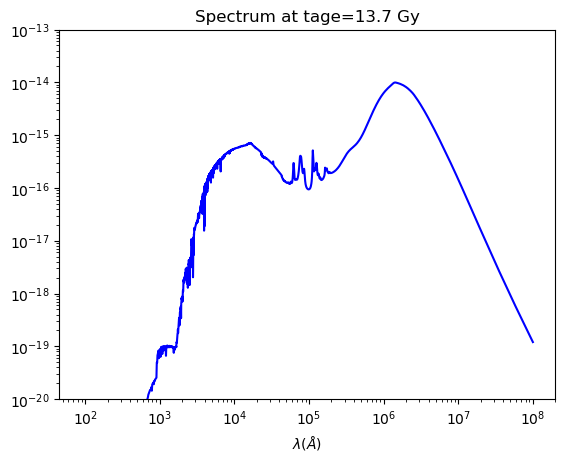

In [8]:
fig, ax = plt.subplots()
ax.loglog(wave,spec,'b-')
ax.set_ylim(1e-20,1e-13)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_title("Spectrum at tage=13.7 Gy")

## Example using nebular emission

We initialize a simple stellar population and set the flag to include nebular emission:

In [ ]:
sp = fsps.StellarPopulation(zcontinuous=1,add_neb_emission=1)

We can change the stellar metallicity, the gas phase metallicity, the gas ionization parameter, and then return the total spectrum at 1 Myr:

In [ ]:
sp.params['logzsol'] = -1.0
sp.params['gas_logz'] = -1.0
sp.params['gas_logu'] = -2.5
wave, spec = sp.get_spectrum(tage=0.001)

In [ ]:
fig, ax = plt.subplots()
ax.loglog(wave,spec,'b-')
#ax.set_ylim(1e-15,1e-11)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_title("Spectrum at tage=1 My")

Note: for the nebular model to be fully self-consistent, the gas phase metallicity and the stellar metallicity should be set to the same value. This effectively adds the emission spectrum to the same stellar spectrum that was used as the ionizing spectrum in Cloudy. If users choose to vary the gas phase metallicity at constant stellar metallicity, expect non-hydrogenic emission lines to be accurate within 1-15%.

Emission line wavelengths and line luminosities can be accessed through the stellar population object:

In [ ]:
#print(sp.emline_wavelengths)
#print(sp.emline_luminosity)

fig, ax = plt.subplots()
ax.loglog(sp.emline_wavelengths,sp.emline_luminosity,'b.')
#ax.set_ylim(1e-15,1e-11)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_title("Emission lines")